# Retrievability and Multiaddress study
This script analyzes both, the retrievability of a CID over the experiment, as the content of those PRs shared when retrieving the Provider of a CID

The script is divided in three main stages:
1. Analyzing individually the direct reply of the PR holders for the entire study
2. Analyzing the reply of those peers sharing the PRs during the DHT lookup over the study
3. Analyzing the final result of the DHT lookup over the study

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from log import custom_parser

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.facecolor"] = "white"

## Define the path to the file containing the logs
LOG_FILE = "./logs.txt" 

## parse the logs using our custom log parser
log_file = custom_parser.LogFile(LOG_FILE)

## analyze the logs
log_file.analyze_logs()

done - no errors


In [5]:
## Once the internal struct of the logs are analyzed, proceed to gather the summaries of all the CIDs
cid_round_stats = {}

# iter through all the list of cids
for cid in log_file.cid_map:
    cid_stats = {
        "duration": [],
        "succ_indv_pings": [],
        "indv_pings": [],
        "succ_indv_lookup_ping": [],
        "indv_lookup_ping": [],
        "lookup": [],
    }
    # for each cid iter through the ping_rounds
    for i, pr in enumerate(log_file.cid_map[cid].ping_rounds):
        pr_sum = pr.summary()
        # append all the metrics to the cid_stats
        cid_stats["duration"].append(pr_sum["total_duration"])
        cid_stats["succ_indv_pings"].append(pr_sum["pr_holder_succ_pings"])
        cid_stats["indv_pings"].append(pr_sum["pr_holder_ping_with_multiaddr"])
        cid_stats["succ_indv_lookup_ping"].append(pr_sum["lookup_succ_pings"])
        cid_stats["indv_lookup_ping"].append(pr_sum["lookup_succ_pings_with_multiaddr"])
        cid_stats["lookup"].append(pr_sum["lookup_final_result"])
        
        #if pr_sum["lookup_succ_pings"] > 20:
        #    print(cid, "pr=", i, "->", pr_sum["lookup_succ_pings"])
        
    # append cid_stats to the cid_round_stats
    cid_round_stats[cid] = cid_stats

print(len(cid_round_stats), "CIDs -> ")
    
    

800 CIDs -> 


In [12]:
# Transforms individual CID distributions into a general one where ping_rounds are grouped
def cid_dists_from_individuals(cid_dists):
    trans_stats = []
    # get len of total ping_rounds
    max_len = 0
    for stats in cid_dists:
        l = len(stats)
        if l > max_len:
            max_len = l
    # init the transposed matrix        
    for i in np.arange(max_len):
        trans_stats.append([])

    # transpose the matrix 
    for stat in cid_dists:
        for i, item in enumerate(stat):
            trans_stats[i].append(item)
    
    return trans_stats

## Display the distribution stats 
def plot_stats_key(cid_stats, key):
    stats_dist = []
    # iter through cids
    for cid in cid_stats:
        stats_dist.append(cid_stats[cid][key]) 
        
    # Transpose the matrix
    correct_stats = cid_dists_from_individuals(stats_dist)
    
    fig, ax = plt.subplots(figsize=(24,15))
    
    ax.boxplot(correct_stats, showfliers=True) 
    #ax.set_title(f"distribution of {key}", fontsize=20)
    ax.set_xlabel("Ping Rounds (3 min delay between pings)", fontsize=16)
    ax.set_ylabel("Number of Peers", fontsize=16)
    plt.show()
   

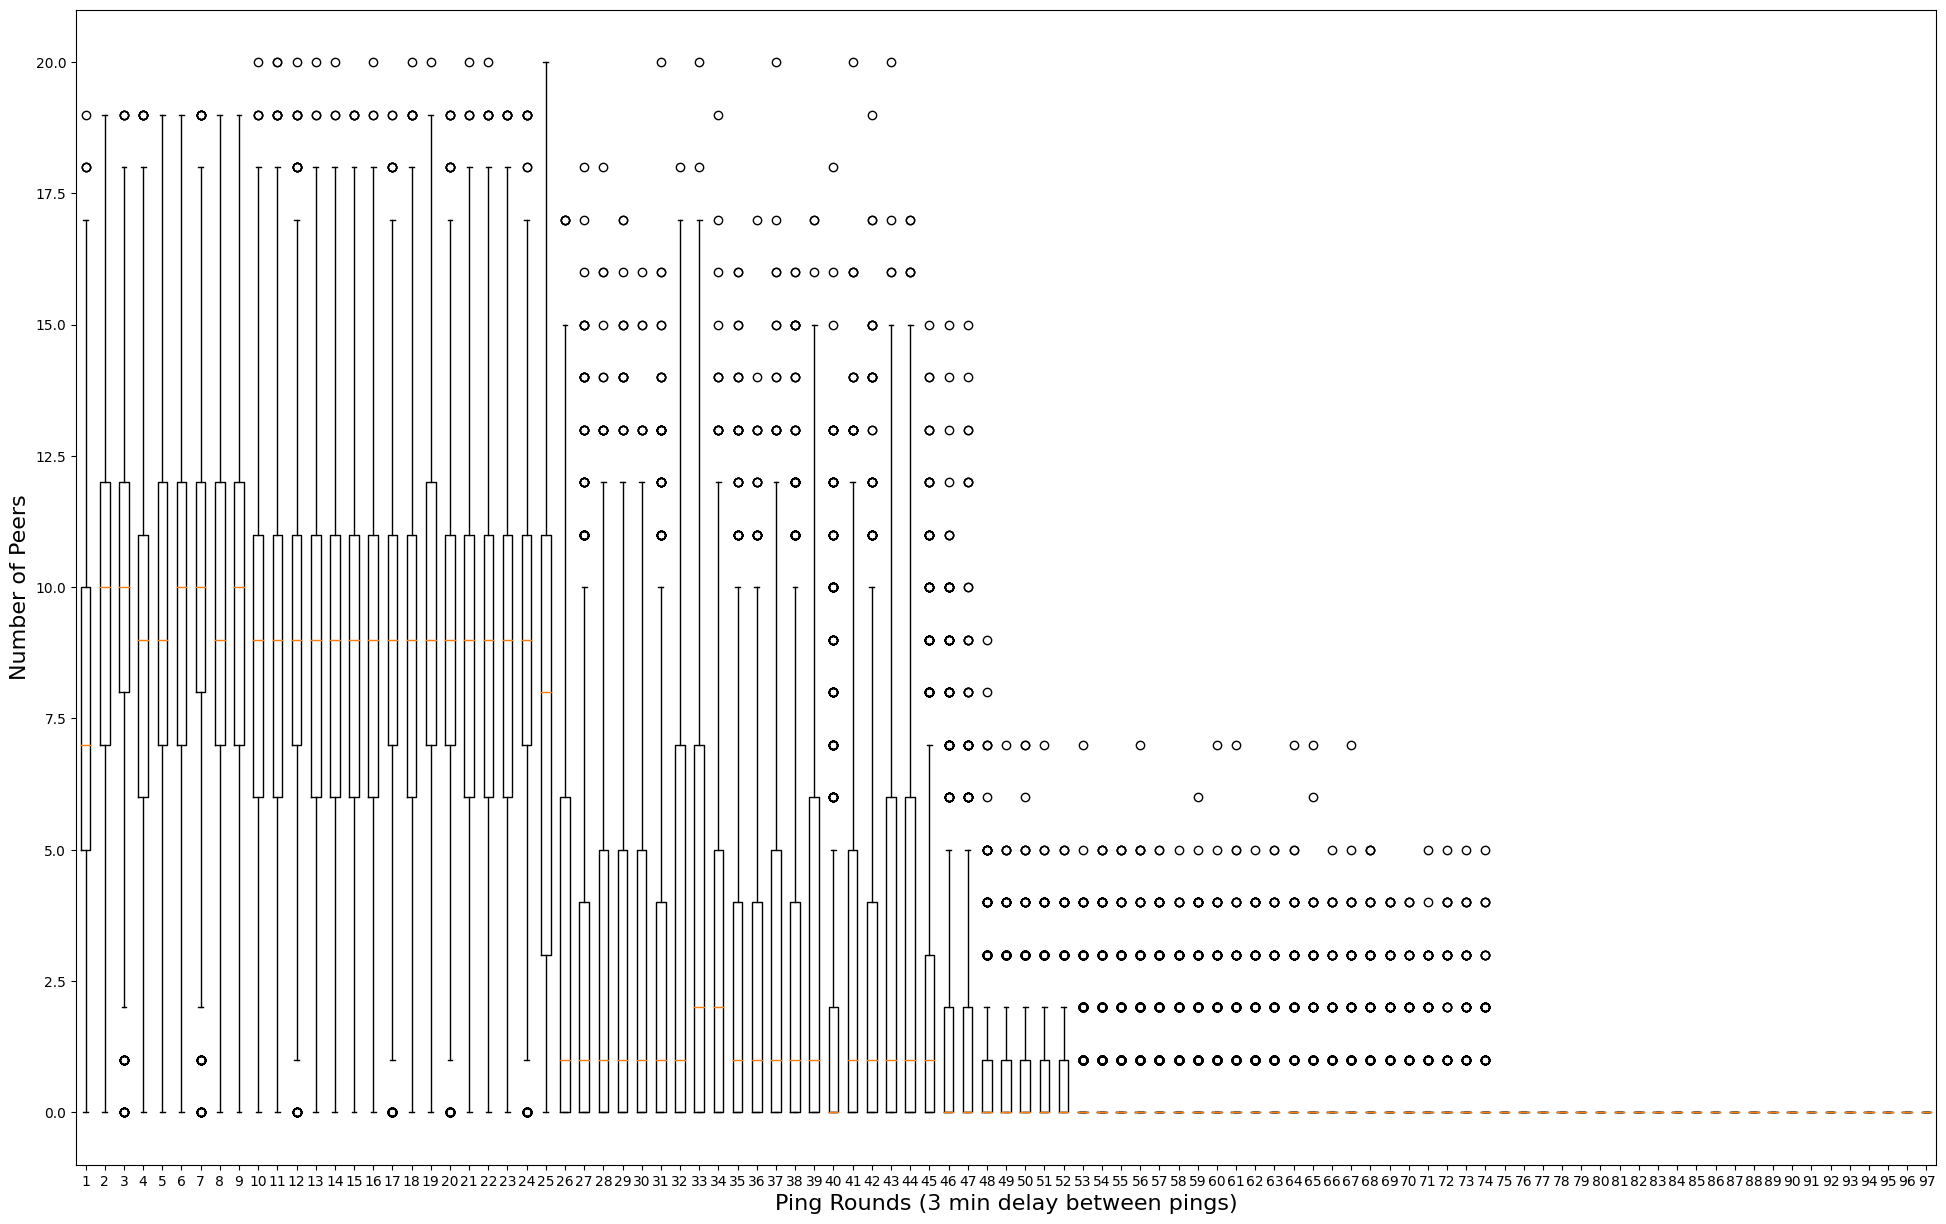

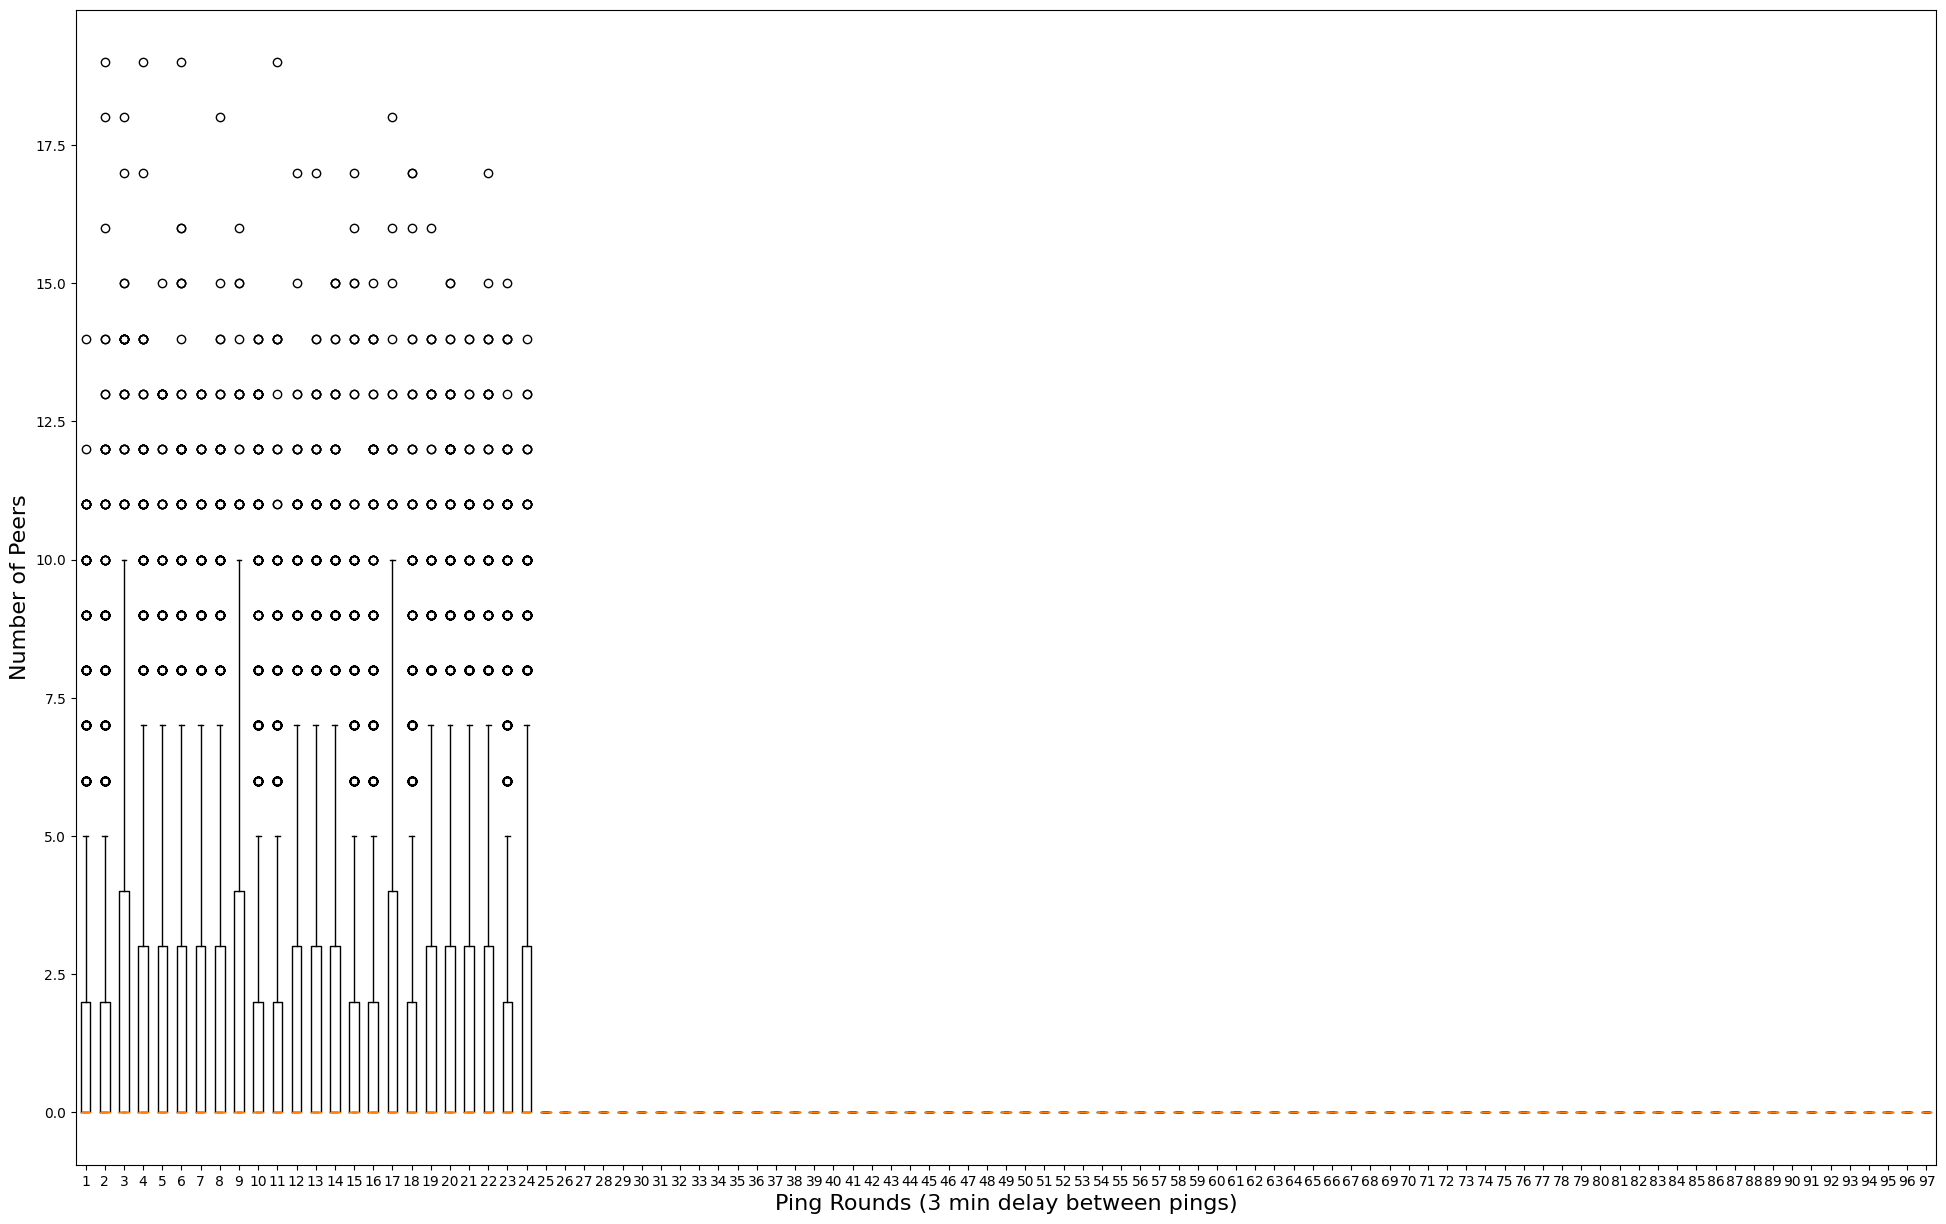

In [13]:
## plot the stats in relation to the individual PR holders' pings

# Check if they shared the PRs
plot_stats_key(cid_round_stats, "succ_indv_pings")  

# Check if the PRs came with the Multiaddresses
plot_stats_key(cid_round_stats, "indv_pings")  

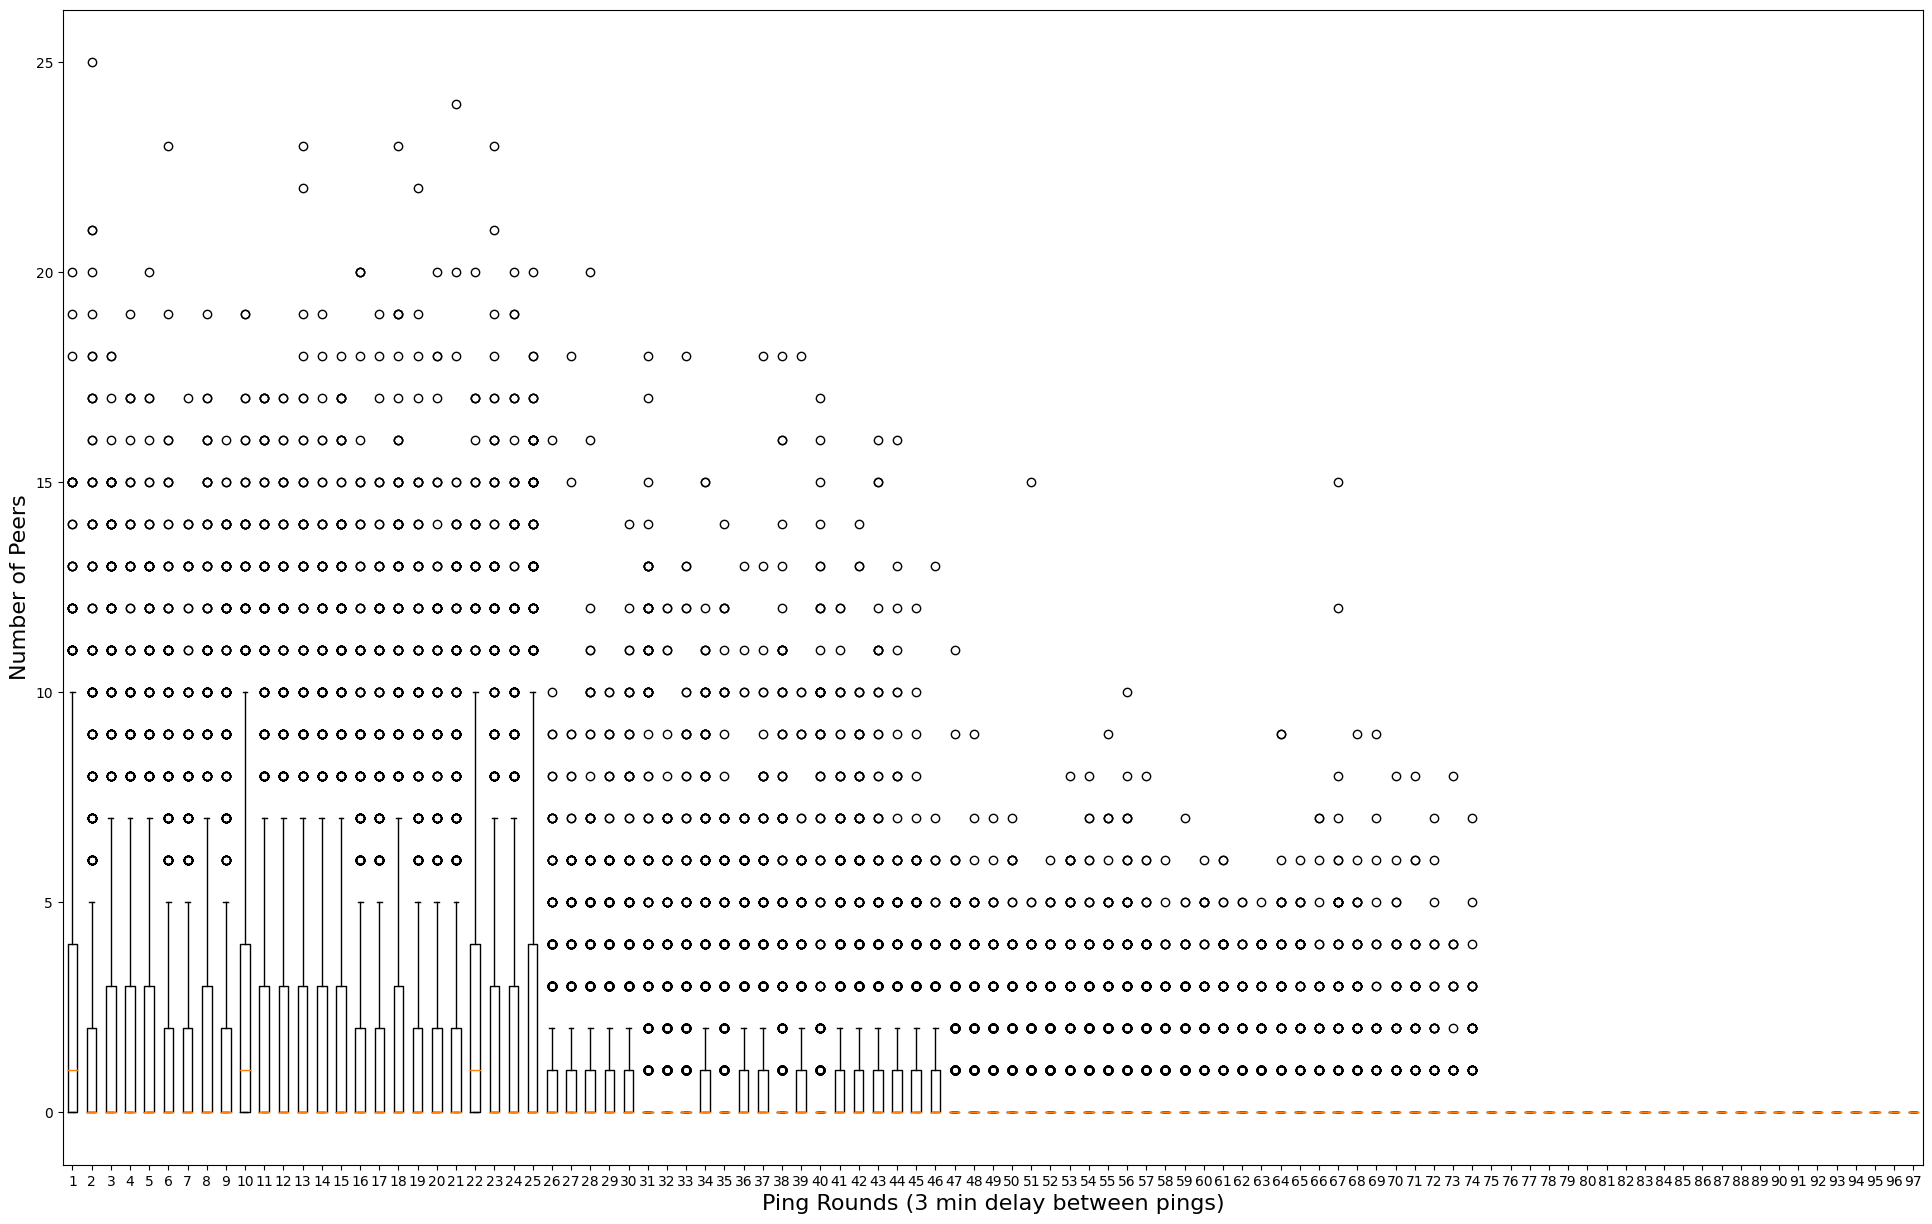

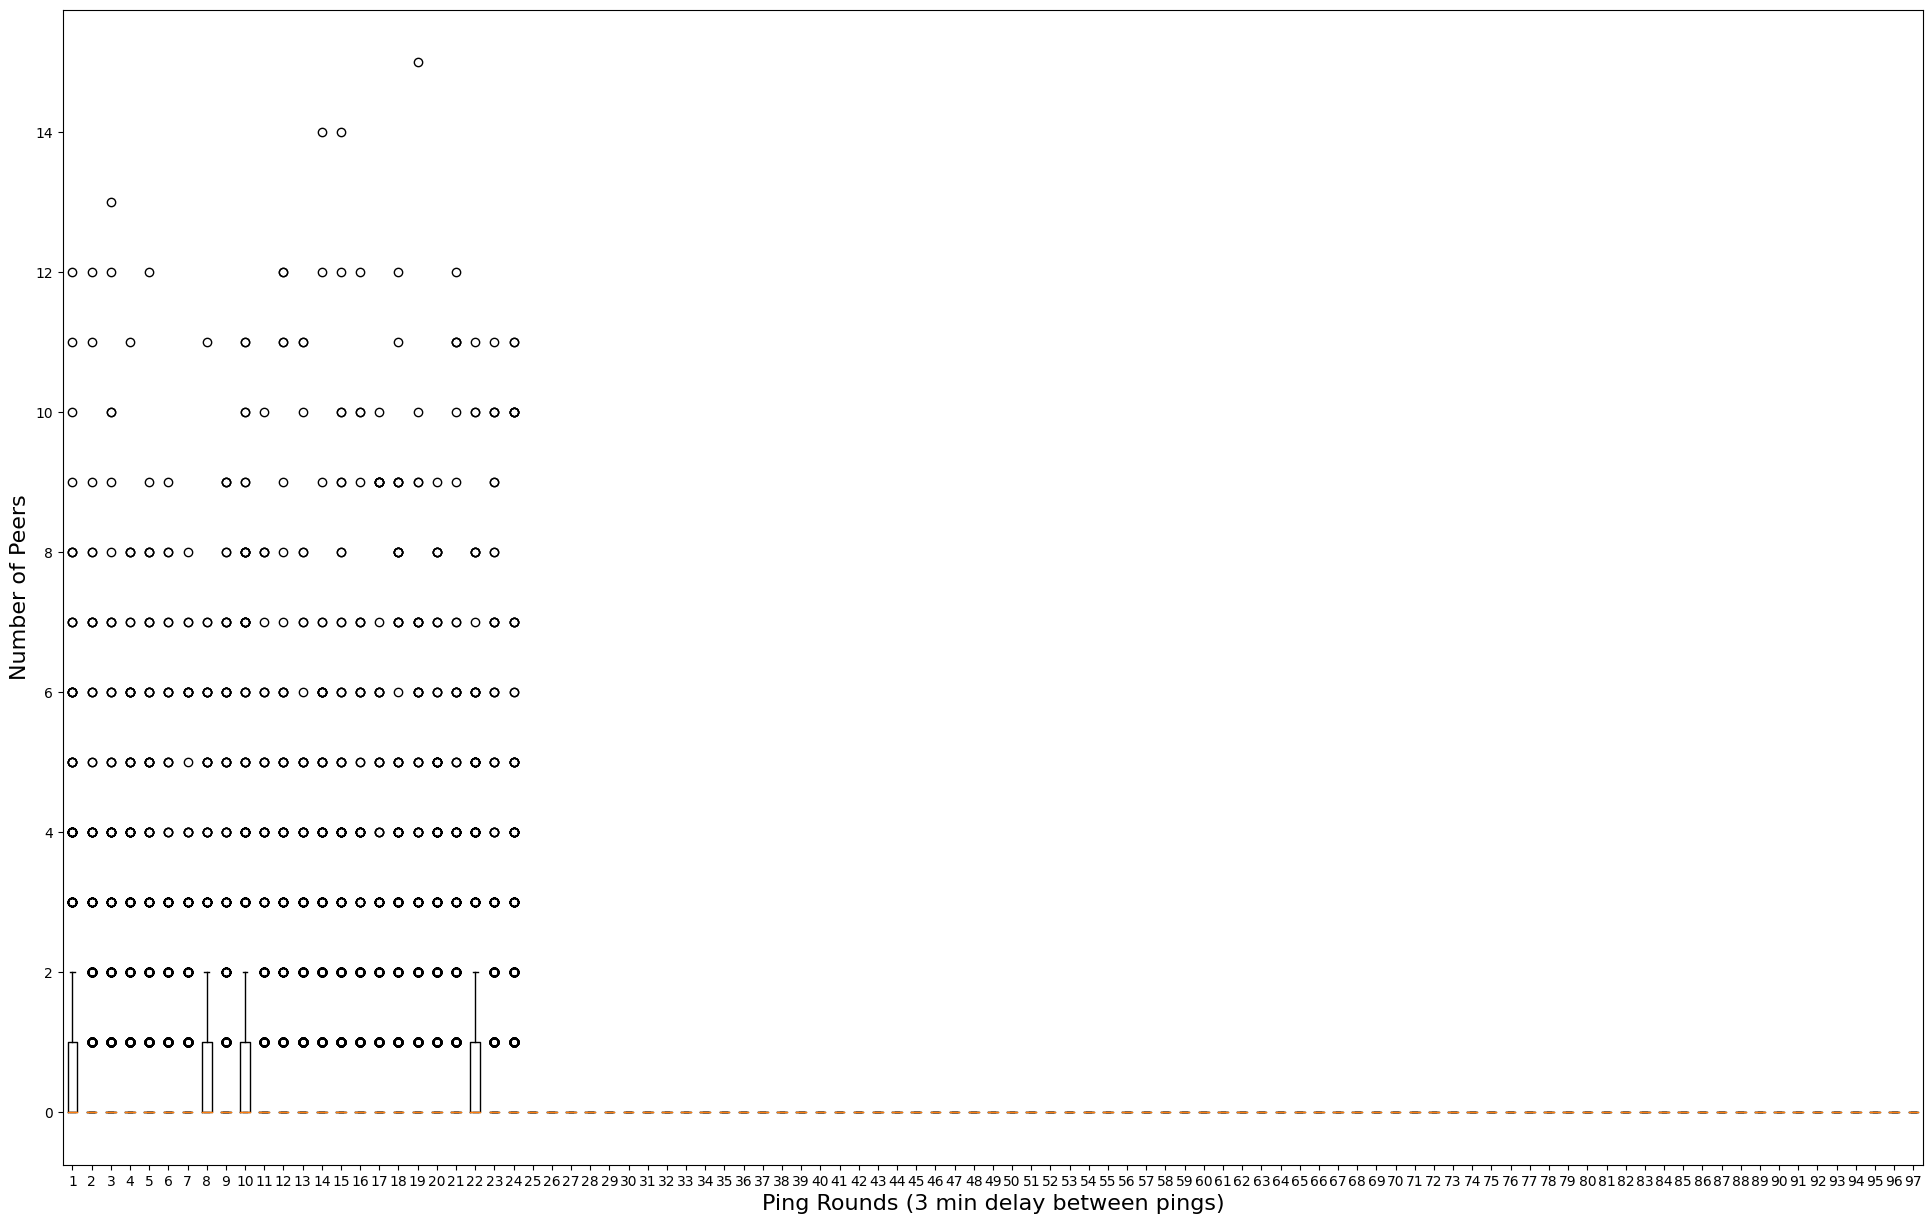

In [14]:
## Plot the stats in relation to the replies during the dht lookup

# Check if they shared the PRs
plot_stats_key(cid_round_stats, "succ_indv_lookup_ping")  

# Check if the PRs came with the Multiaddresses
plot_stats_key(cid_round_stats, "indv_lookup_ping")  

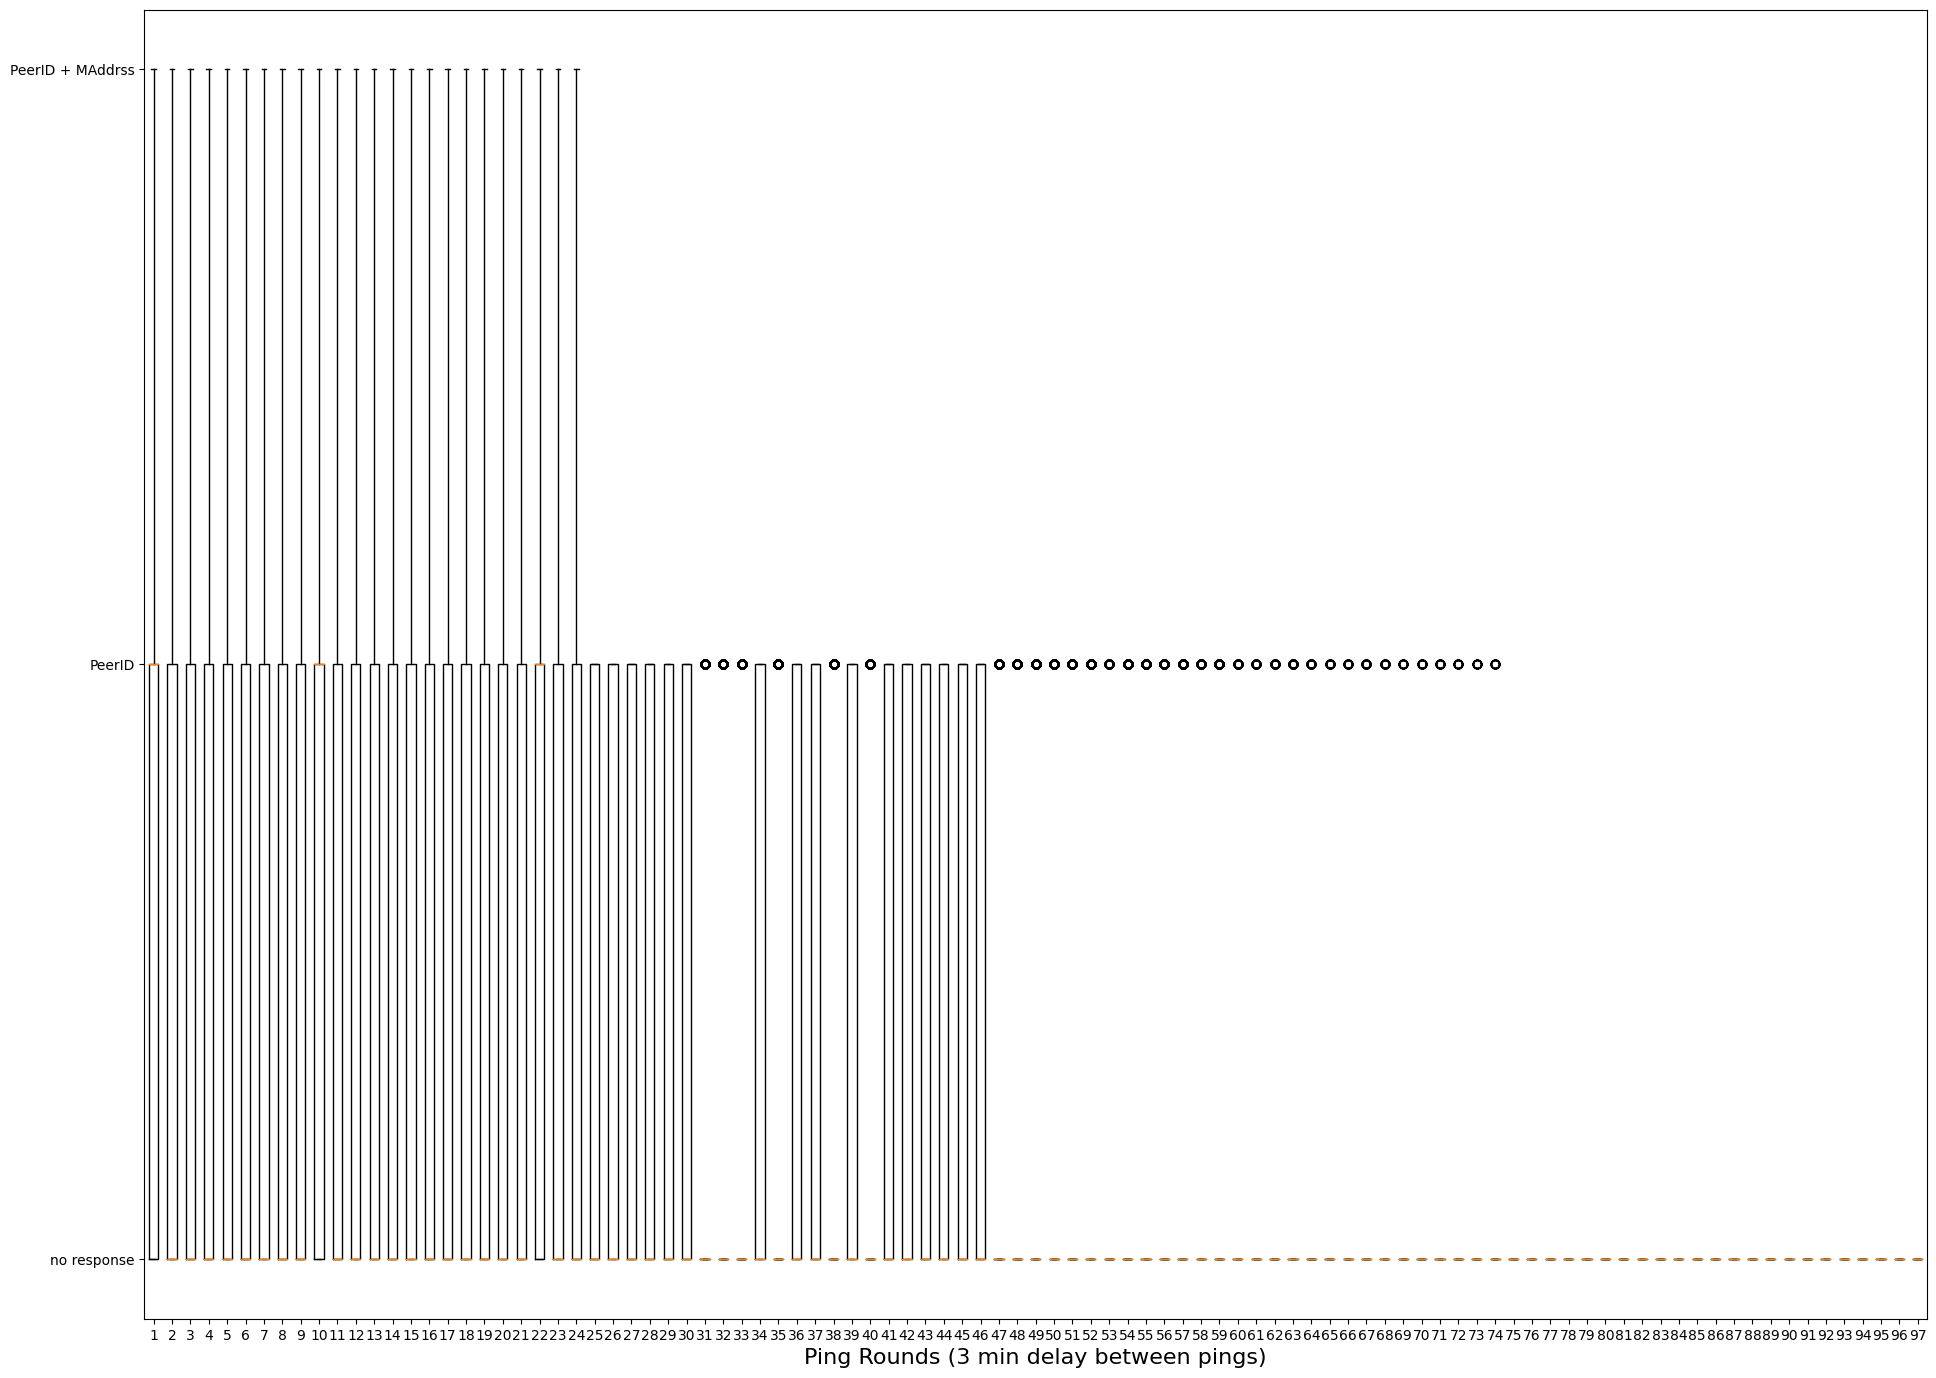

In [18]:
## plot the stats in relation to the DHT result

key = "lookup"

stats_dist = []
# iter through cids
for cid in cid_round_stats:
    stats_dist.append(cid_round_stats[cid][key]) 

# Transpose the matrix
correct_stats = cid_dists_from_individuals(stats_dist)

# Custom plot
fig, ax = plt.subplots(figsize=(23,17))
ax.boxplot(correct_stats, showfliers=True) 
#ax.set_title(f"distribution of {key}", fontsize=20)
ax.set_xlabel("Ping Rounds (3 min delay between pings)", fontsize=16)
ax.set_yticks([0, 1, 2]) 
ax.set_yticklabels(["no response", "PeerID", "PeerID + MAddrss"])
plt.show() 